In [1]:
import os
import sys
import random
import warnings
import numpy as np
import skimage

import matplotlib.pyplot as plt
from tqdm import tqdm
from itertools import chain
from skimage.io import imread, imshow, imread_collection, concatenate_images
from skimage.transform import resize
from skimage.morphology import label
from tensorflow.keras.models import Model, load_model
from keras.layers import Input
from keras.layers.core import Dropout, Lambda
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
import tensorflow as tf


warnings.filterwarnings('ignore', category=UserWarning, module='skimage')


Using TensorFlow backend.


In [59]:
from PIL import Image, ImageChops

In [2]:
seed = 42
np.random.seed = seed

IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3

In [3]:
TRAIN_PATH = 'D:/Lungs/train/'
TEST_PATH = 'D:/Lungs/test/'


In [4]:
train_ids = next(os.walk(TRAIN_PATH))[1]
test_ids = next(os.walk(TEST_PATH))[1]

X_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)


Resizing training images and masks


  0%|                                                                                          | 0/224 [00:00<?, ?it/s]

(2048, 2048, 3)


  0%|▎                                                                                 | 1/224 [00:04<15:15,  4.10s/it]

(2048, 2048, 3)


  1%|▋                                                                                 | 2/224 [00:07<14:15,  3.85s/it]

(2048, 2048, 3)


  1%|█                                                                                 | 3/224 [00:11<14:08,  3.84s/it]

(2048, 2048, 3)


  2%|█▍                                                                                | 4/224 [00:14<13:49,  3.77s/it]

(2048, 2048, 3)


  2%|█▊                                                                                | 5/224 [00:17<12:39,  3.47s/it]

(2048, 2048, 3)


  3%|██▏                                                                               | 6/224 [00:20<12:21,  3.40s/it]

(2048, 2048, 3)


  3%|██▌                                                                               | 7/224 [00:23<11:30,  3.18s/it]

(2048, 2048, 3)


  4%|██▉                                                                               | 8/224 [00:26<10:55,  3.03s/it]

(2048, 2048, 3)


  4%|███▎                                                                              | 9/224 [00:28<10:31,  2.94s/it]

(2048, 2048, 3)


  4%|███▌                                                                             | 10/224 [00:31<10:12,  2.86s/it]

(2048, 2048, 3)


  5%|███▉                                                                             | 11/224 [00:34<10:01,  2.82s/it]

(2048, 2048, 3)


  5%|████▎                                                                            | 12/224 [00:36<09:47,  2.77s/it]

(2048, 2048, 3)


  6%|████▋                                                                            | 13/224 [00:39<09:49,  2.79s/it]

(2048, 2048, 3)


  6%|█████                                                                            | 14/224 [00:42<09:35,  2.74s/it]

(2048, 2048, 3)


  7%|█████▍                                                                           | 15/224 [00:45<09:26,  2.71s/it]

(2048, 2048, 3)


  7%|█████▊                                                                           | 16/224 [00:47<09:24,  2.72s/it]

(2048, 2048, 3)


  8%|██████▏                                                                          | 17/224 [00:50<09:18,  2.70s/it]

(2048, 2048, 3)


  8%|██████▌                                                                          | 18/224 [00:53<09:37,  2.80s/it]

(2048, 2048, 3)


  8%|██████▊                                                                          | 19/224 [00:56<09:26,  2.76s/it]

(2048, 2048, 3)


  9%|███████▏                                                                         | 20/224 [00:58<09:16,  2.73s/it]

(2048, 2048, 3)


  9%|███████▌                                                                         | 21/224 [01:01<09:15,  2.73s/it]

(2048, 2048, 3)


 10%|███████▉                                                                         | 22/224 [01:04<09:09,  2.72s/it]

(2048, 2048, 3)


 10%|████████▎                                                                        | 23/224 [01:06<09:05,  2.71s/it]

(2048, 2048, 3)


 11%|████████▋                                                                        | 24/224 [01:09<08:56,  2.68s/it]

(2048, 2048, 3)


 11%|█████████                                                                        | 25/224 [01:12<08:54,  2.68s/it]

(2048, 2048, 3)


 12%|█████████▍                                                                       | 26/224 [01:14<08:46,  2.66s/it]

(2048, 2048, 3)


 12%|█████████▊                                                                       | 27/224 [01:17<08:49,  2.69s/it]

(2048, 2048, 3)


 12%|██████████▏                                                                      | 28/224 [01:20<08:46,  2.69s/it]

(2048, 2048, 3)


 13%|██████████▍                                                                      | 29/224 [01:23<08:51,  2.72s/it]

(2048, 2048, 3)


 13%|██████████▊                                                                      | 30/224 [01:26<09:11,  2.84s/it]

(2048, 2048, 3)


 14%|███████████▏                                                                     | 31/224 [01:28<08:57,  2.79s/it]

(2048, 2048, 3)


 14%|███████████▌                                                                     | 32/224 [01:32<09:19,  2.91s/it]

(2048, 2048, 3)


 15%|███████████▉                                                                     | 33/224 [01:34<09:07,  2.87s/it]

(2048, 2048, 3)


 15%|████████████▎                                                                    | 34/224 [01:37<08:53,  2.81s/it]

(2048, 2048, 3)


 16%|████████████▋                                                                    | 35/224 [01:40<08:41,  2.76s/it]

(2048, 2048, 3)


 16%|█████████████                                                                    | 36/224 [01:42<08:29,  2.71s/it]

(2048, 2048, 3)


 17%|█████████████▍                                                                   | 37/224 [01:45<08:28,  2.72s/it]

(2048, 2048, 3)


 17%|█████████████▋                                                                   | 38/224 [01:48<08:21,  2.70s/it]

(2048, 2048, 3)


 17%|██████████████                                                                   | 39/224 [01:50<08:23,  2.72s/it]

(2048, 2048, 3)


 18%|██████████████▍                                                                  | 40/224 [01:53<08:29,  2.77s/it]

(2048, 2048, 3)


 18%|██████████████▊                                                                  | 41/224 [01:56<08:43,  2.86s/it]

(2048, 2048, 3)


 19%|███████████████▏                                                                 | 42/224 [01:59<08:32,  2.81s/it]

(2048, 2048, 3)


 19%|███████████████▌                                                                 | 43/224 [02:02<08:13,  2.73s/it]

(2048, 2048, 3)


 20%|███████████████▉                                                                 | 44/224 [02:04<08:09,  2.72s/it]

(2048, 2048, 3)


 20%|████████████████▎                                                                | 45/224 [02:07<07:57,  2.67s/it]

(2048, 2048, 3)


 21%|████████████████▋                                                                | 46/224 [02:09<07:55,  2.67s/it]

(2048, 2048, 3)


 21%|████████████████▉                                                                | 47/224 [02:12<07:50,  2.66s/it]

(2048, 2048, 3)


 21%|█████████████████▎                                                               | 48/224 [02:15<07:47,  2.66s/it]

(2048, 2048, 3)


 22%|█████████████████▋                                                               | 49/224 [02:17<07:44,  2.65s/it]

(2048, 2048, 3)


 22%|██████████████████                                                               | 50/224 [02:20<07:46,  2.68s/it]

(2048, 2048, 3)


 23%|██████████████████▍                                                              | 51/224 [02:23<07:40,  2.66s/it]

(2048, 2048, 3)


 23%|██████████████████▊                                                              | 52/224 [02:26<07:53,  2.75s/it]

(2048, 2048, 3)


 24%|███████████████████▏                                                             | 53/224 [02:29<07:59,  2.81s/it]

(2048, 2048, 3)


 24%|███████████████████▌                                                             | 54/224 [02:31<07:48,  2.76s/it]

(2048, 2048, 3)


 25%|███████████████████▉                                                             | 55/224 [02:34<07:38,  2.71s/it]

(2048, 2048, 3)


 25%|████████████████████▎                                                            | 56/224 [02:37<07:32,  2.69s/it]

(2048, 2048, 3)


 25%|████████████████████▌                                                            | 57/224 [02:39<07:26,  2.67s/it]

(2048, 2048, 3)


 26%|████████████████████▉                                                            | 58/224 [02:42<07:28,  2.70s/it]

(2048, 2048, 3)


 26%|█████████████████████▎                                                           | 59/224 [02:45<07:23,  2.69s/it]

(2048, 2048, 3)


 27%|█████████████████████▋                                                           | 60/224 [02:47<07:24,  2.71s/it]

(2048, 2048, 3)


 27%|██████████████████████                                                           | 61/224 [02:50<07:19,  2.69s/it]

(2048, 2048, 3)


 28%|██████████████████████▍                                                          | 62/224 [02:53<07:18,  2.71s/it]

(2048, 2048, 3)


 28%|██████████████████████▊                                                          | 63/224 [02:55<07:12,  2.69s/it]

(2048, 2048, 3)


 29%|███████████████████████▏                                                         | 64/224 [02:58<07:06,  2.66s/it]

(2048, 2048, 3)


 29%|███████████████████████▌                                                         | 65/224 [03:01<07:01,  2.65s/it]

(2048, 2048, 3)


 29%|███████████████████████▊                                                         | 66/224 [03:03<06:58,  2.65s/it]

(2048, 2048, 3)


 30%|████████████████████████▏                                                        | 67/224 [03:06<06:55,  2.65s/it]

(2048, 2048, 3)


 30%|████████████████████████▌                                                        | 68/224 [03:09<06:51,  2.64s/it]

(2048, 2048, 3)


 31%|████████████████████████▉                                                        | 69/224 [03:11<06:50,  2.65s/it]

(2048, 2048, 3)


 31%|█████████████████████████▎                                                       | 70/224 [03:14<06:52,  2.68s/it]

(2048, 2048, 3)


 32%|█████████████████████████▋                                                       | 71/224 [03:17<06:48,  2.67s/it]

(2048, 2048, 3)


 32%|██████████████████████████                                                       | 72/224 [03:19<06:43,  2.66s/it]

(2048, 2048, 3)


 33%|██████████████████████████▍                                                      | 73/224 [03:22<06:39,  2.64s/it]

(2048, 2048, 3)


 33%|██████████████████████████▊                                                      | 74/224 [03:25<06:35,  2.64s/it]

(2048, 2048, 3)


 33%|███████████████████████████                                                      | 75/224 [03:26<05:43,  2.30s/it]

(2048, 2048, 3)


 34%|███████████████████████████▍                                                     | 76/224 [03:28<05:04,  2.06s/it]

(2048, 2048, 3)


 34%|███████████████████████████▊                                                     | 77/224 [03:29<04:33,  1.86s/it]

(2048, 2048, 3)


 35%|████████████████████████████▏                                                    | 78/224 [03:31<04:41,  1.93s/it]

(2048, 2048, 3)


 35%|████████████████████████████▌                                                    | 79/224 [03:34<05:12,  2.15s/it]

(2048, 2048, 3)


 36%|████████████████████████████▉                                                    | 80/224 [03:35<04:54,  2.05s/it]

(2048, 2048, 3)


 36%|█████████████████████████████▎                                                   | 81/224 [03:37<04:25,  1.85s/it]

(2048, 2048, 3)


 37%|█████████████████████████████▋                                                   | 82/224 [03:39<04:23,  1.86s/it]

(2048, 2048, 3)


 37%|██████████████████████████████                                                   | 83/224 [03:40<04:08,  1.76s/it]

(2048, 2048, 3)


 38%|██████████████████████████████▍                                                  | 84/224 [03:41<03:37,  1.56s/it]

(2048, 2048, 3)


 38%|██████████████████████████████▋                                                  | 85/224 [03:42<03:15,  1.41s/it]

(2048, 2048, 3)


 38%|███████████████████████████████                                                  | 86/224 [03:44<03:14,  1.41s/it]

(2048, 2048, 3)


 39%|███████████████████████████████▍                                                 | 87/224 [03:45<02:59,  1.31s/it]

(2048, 2048, 3)


 39%|███████████████████████████████▊                                                 | 88/224 [03:46<02:48,  1.24s/it]

(2048, 2048, 3)


 40%|████████████████████████████████▏                                                | 89/224 [03:47<02:41,  1.19s/it]

(2048, 2048, 3)


 40%|████████████████████████████████▌                                                | 90/224 [03:48<02:34,  1.16s/it]

(2048, 2048, 3)


 41%|████████████████████████████████▉                                                | 91/224 [03:49<02:29,  1.12s/it]

(2048, 2048, 3)


 41%|█████████████████████████████████▎                                               | 92/224 [03:50<02:25,  1.11s/it]

(2048, 2048, 3)


 42%|█████████████████████████████████▋                                               | 93/224 [03:51<02:22,  1.09s/it]

(2048, 2048, 3)


 42%|█████████████████████████████████▉                                               | 94/224 [03:52<02:22,  1.10s/it]

(2048, 2048, 3)


 42%|██████████████████████████████████▎                                              | 95/224 [03:53<02:20,  1.09s/it]

(2048, 2048, 3)


 43%|██████████████████████████████████▋                                              | 96/224 [03:55<02:18,  1.08s/it]

(2048, 2048, 3)


 43%|███████████████████████████████████                                              | 97/224 [03:56<02:17,  1.08s/it]

(2048, 2048, 3)


 44%|███████████████████████████████████▍                                             | 98/224 [03:57<02:16,  1.08s/it]

(2048, 2048, 3)


 44%|███████████████████████████████████▊                                             | 99/224 [03:58<02:18,  1.11s/it]

(2048, 2048, 3)


 45%|███████████████████████████████████▋                                            | 100/224 [03:59<02:16,  1.10s/it]

(2048, 2048, 3)


 45%|████████████████████████████████████                                            | 101/224 [04:00<02:14,  1.10s/it]

(2048, 2048, 3)


 46%|████████████████████████████████████▍                                           | 102/224 [04:01<02:12,  1.09s/it]

(2048, 2048, 3)


 46%|████████████████████████████████████▊                                           | 103/224 [04:02<02:13,  1.10s/it]

(2048, 2048, 3)


 46%|█████████████████████████████████████▏                                          | 104/224 [04:03<02:11,  1.09s/it]

(2048, 2048, 3)


 47%|█████████████████████████████████████▌                                          | 105/224 [04:04<02:08,  1.08s/it]

(2048, 2048, 3)


 47%|█████████████████████████████████████▊                                          | 106/224 [04:05<02:06,  1.07s/it]

(2048, 2048, 3)


 48%|██████████████████████████████████████▏                                         | 107/224 [04:07<02:05,  1.08s/it]

(2048, 2048, 3)


 48%|██████████████████████████████████████▌                                         | 108/224 [04:08<02:04,  1.07s/it]

(2048, 2048, 3)


 49%|██████████████████████████████████████▉                                         | 109/224 [04:09<02:02,  1.07s/it]

(2048, 2048, 3)


 49%|███████████████████████████████████████▎                                        | 110/224 [04:10<02:02,  1.07s/it]

(2048, 2048, 3)


 50%|███████████████████████████████████████▋                                        | 111/224 [04:11<02:00,  1.06s/it]

(2048, 2048, 3)


 50%|████████████████████████████████████████                                        | 112/224 [04:12<01:59,  1.06s/it]

(2048, 2048, 3)


 50%|████████████████████████████████████████▎                                       | 113/224 [04:13<02:16,  1.23s/it]

(2048, 2048, 3)


 51%|████████████████████████████████████████▋                                       | 114/224 [04:15<02:35,  1.41s/it]

(2048, 2048, 3)


 51%|█████████████████████████████████████████                                       | 115/224 [04:16<02:23,  1.32s/it]

(2048, 2048, 3)


 52%|█████████████████████████████████████████▍                                      | 116/224 [04:17<02:14,  1.24s/it]

(2048, 2048, 3)


 52%|█████████████████████████████████████████▊                                      | 117/224 [04:18<02:06,  1.18s/it]

(2048, 2048, 3)


 53%|██████████████████████████████████████████▏                                     | 118/224 [04:20<02:01,  1.14s/it]

(2048, 2048, 3)


 53%|██████████████████████████████████████████▌                                     | 119/224 [04:21<01:57,  1.12s/it]

(2048, 2048, 3)


 54%|██████████████████████████████████████████▊                                     | 120/224 [04:22<01:54,  1.10s/it]

(2048, 2048, 3)


 54%|███████████████████████████████████████████▏                                    | 121/224 [04:23<01:52,  1.09s/it]

(2048, 2048, 3)


 54%|███████████████████████████████████████████▌                                    | 122/224 [04:24<01:50,  1.08s/it]

(2048, 2048, 3)


 55%|███████████████████████████████████████████▉                                    | 123/224 [04:25<01:48,  1.07s/it]

(2048, 2048, 3)


 55%|████████████████████████████████████████████▎                                   | 124/224 [04:26<01:47,  1.07s/it]

(2048, 2048, 3)


 56%|████████████████████████████████████████████▋                                   | 125/224 [04:27<01:45,  1.07s/it]

(2048, 2048, 3)


 56%|█████████████████████████████████████████████                                   | 126/224 [04:28<01:44,  1.07s/it]

(2048, 2048, 3)


 57%|█████████████████████████████████████████████▎                                  | 127/224 [04:29<01:43,  1.06s/it]

(2048, 2048, 3)


 57%|█████████████████████████████████████████████▋                                  | 128/224 [04:30<01:42,  1.06s/it]

(2048, 2048, 3)


 58%|██████████████████████████████████████████████                                  | 129/224 [04:31<01:41,  1.06s/it]

(2048, 2048, 3)


 58%|██████████████████████████████████████████████▍                                 | 130/224 [04:32<01:39,  1.06s/it]

(2048, 2048, 3)


 58%|██████████████████████████████████████████████▊                                 | 131/224 [04:33<01:38,  1.06s/it]

(2048, 2048, 3)


 59%|███████████████████████████████████████████████▏                                | 132/224 [04:34<01:37,  1.06s/it]

(2048, 2048, 3)


 59%|███████████████████████████████████████████████▌                                | 133/224 [04:36<01:49,  1.21s/it]

(2048, 2048, 3)


 60%|███████████████████████████████████████████████▊                                | 134/224 [04:37<01:44,  1.16s/it]

(2048, 2048, 3)


 60%|████████████████████████████████████████████████▏                               | 135/224 [04:38<01:40,  1.13s/it]

(2048, 2048, 3)


 61%|████████████████████████████████████████████████▌                               | 136/224 [04:39<01:37,  1.11s/it]

(2048, 2048, 3)


 61%|████████████████████████████████████████████████▉                               | 137/224 [04:40<01:34,  1.09s/it]

(2048, 2048, 3)


 62%|█████████████████████████████████████████████████▎                              | 138/224 [04:41<01:32,  1.08s/it]

(2048, 2048, 3)


 62%|█████████████████████████████████████████████████▋                              | 139/224 [04:42<01:30,  1.07s/it]

(2048, 2048, 3)


 62%|██████████████████████████████████████████████████                              | 140/224 [04:43<01:29,  1.07s/it]

(2048, 2048, 3)


 63%|██████████████████████████████████████████████████▎                             | 141/224 [04:44<01:28,  1.07s/it]

(2048, 2048, 3)


 63%|██████████████████████████████████████████████████▋                             | 142/224 [04:45<01:27,  1.06s/it]

(2048, 2048, 3)


 64%|███████████████████████████████████████████████████                             | 143/224 [04:47<01:27,  1.08s/it]

(2048, 2048, 3)


 64%|███████████████████████████████████████████████████▍                            | 144/224 [04:48<01:25,  1.07s/it]

(2048, 2048, 3)


 65%|███████████████████████████████████████████████████▊                            | 145/224 [04:49<01:24,  1.07s/it]

(2048, 2048, 3)


 65%|████████████████████████████████████████████████████▏                           | 146/224 [04:50<01:23,  1.07s/it]

(2048, 2048, 3)


 66%|████████████████████████████████████████████████████▌                           | 147/224 [04:51<01:21,  1.06s/it]

(2048, 2048, 3)


 66%|████████████████████████████████████████████████████▊                           | 148/224 [04:52<01:20,  1.06s/it]

(2048, 2048, 3)


 67%|█████████████████████████████████████████████████████▏                          | 149/224 [04:53<01:19,  1.06s/it]

(2048, 2048, 3)


 67%|█████████████████████████████████████████████████████▌                          | 150/224 [04:54<01:17,  1.05s/it]

(2048, 2048, 3)


 67%|█████████████████████████████████████████████████████▉                          | 151/224 [04:55<01:16,  1.05s/it]

(2048, 2048, 3)


 68%|██████████████████████████████████████████████████████▎                         | 152/224 [04:56<01:15,  1.05s/it]

(2048, 2048, 3)


 68%|██████████████████████████████████████████████████████▋                         | 153/224 [04:57<01:15,  1.06s/it]

(2048, 2048, 3)


 69%|███████████████████████████████████████████████████████                         | 154/224 [04:58<01:14,  1.06s/it]

(2048, 2048, 3)


 69%|███████████████████████████████████████████████████████▎                        | 155/224 [04:59<01:13,  1.06s/it]

(2048, 2048, 3)


 70%|███████████████████████████████████████████████████████▋                        | 156/224 [05:00<01:12,  1.06s/it]

(2048, 2048, 3)


 70%|████████████████████████████████████████████████████████                        | 157/224 [05:01<01:10,  1.05s/it]

(2048, 2048, 3)


 71%|████████████████████████████████████████████████████████▍                       | 158/224 [05:02<01:10,  1.06s/it]

(2048, 2048, 3)


 71%|████████████████████████████████████████████████████████▊                       | 159/224 [05:03<01:09,  1.06s/it]

(2048, 2048, 3)


 71%|█████████████████████████████████████████████████████████▏                      | 160/224 [05:05<01:07,  1.06s/it]

(2048, 2048, 3)


 72%|█████████████████████████████████████████████████████████▌                      | 161/224 [05:06<01:06,  1.06s/it]

(2048, 2048, 3)


 72%|█████████████████████████████████████████████████████████▊                      | 162/224 [05:07<01:05,  1.06s/it]

(2048, 2048, 3)


 73%|██████████████████████████████████████████████████████████▏                     | 163/224 [05:08<01:04,  1.06s/it]

(2048, 2048, 3)


 73%|██████████████████████████████████████████████████████████▌                     | 164/224 [05:09<01:03,  1.06s/it]

(2048, 2048, 3)


 74%|██████████████████████████████████████████████████████████▉                     | 165/224 [05:10<01:02,  1.05s/it]

(2048, 2048, 3)


 74%|███████████████████████████████████████████████████████████▎                    | 166/224 [05:11<01:01,  1.06s/it]

(2048, 2048, 3)


 75%|███████████████████████████████████████████████████████████▋                    | 167/224 [05:12<01:01,  1.08s/it]

(2048, 2048, 3)


 75%|████████████████████████████████████████████████████████████                    | 168/224 [05:13<00:59,  1.07s/it]

(2048, 2048, 3)


 75%|████████████████████████████████████████████████████████████▎                   | 169/224 [05:14<00:58,  1.06s/it]

(2048, 2048, 3)


 76%|████████████████████████████████████████████████████████████▋                   | 170/224 [05:15<00:57,  1.06s/it]

(2048, 2048, 3)


 76%|█████████████████████████████████████████████████████████████                   | 171/224 [05:16<00:56,  1.06s/it]

(2048, 2048, 3)


 77%|█████████████████████████████████████████████████████████████▍                  | 172/224 [05:17<00:54,  1.05s/it]

(2048, 2048, 3)


 77%|█████████████████████████████████████████████████████████████▊                  | 173/224 [05:18<00:53,  1.05s/it]

(2048, 2048, 3)


 78%|██████████████████████████████████████████████████████████████▏                 | 174/224 [05:19<00:52,  1.06s/it]

(2048, 2048, 3)


 78%|██████████████████████████████████████████████████████████████▌                 | 175/224 [05:20<00:51,  1.06s/it]

(2048, 2048, 3)


 79%|██████████████████████████████████████████████████████████████▊                 | 176/224 [05:21<00:50,  1.05s/it]

(2048, 2048, 3)


 79%|███████████████████████████████████████████████████████████████▏                | 177/224 [05:23<00:49,  1.06s/it]

(2048, 2048, 3)


 79%|███████████████████████████████████████████████████████████████▌                | 178/224 [05:24<00:48,  1.06s/it]

(2048, 2048, 3)


 80%|███████████████████████████████████████████████████████████████▉                | 179/224 [05:25<00:47,  1.06s/it]

(2048, 2048, 3)


 80%|████████████████████████████████████████████████████████████████▎               | 180/224 [05:26<00:46,  1.06s/it]

(2048, 2048, 3)


 81%|████████████████████████████████████████████████████████████████▋               | 181/224 [05:27<00:45,  1.06s/it]

(2048, 2048, 3)


 81%|█████████████████████████████████████████████████████████████████               | 182/224 [05:28<00:44,  1.06s/it]

(2048, 2048, 3)


 82%|█████████████████████████████████████████████████████████████████▎              | 183/224 [05:29<00:43,  1.06s/it]

(2048, 2048, 3)


 82%|█████████████████████████████████████████████████████████████████▋              | 184/224 [05:30<00:42,  1.06s/it]

(2048, 2048, 3)


 83%|██████████████████████████████████████████████████████████████████              | 185/224 [05:31<00:41,  1.06s/it]

(2048, 2048, 3)


 83%|██████████████████████████████████████████████████████████████████▍             | 186/224 [05:32<00:40,  1.07s/it]

(2048, 2048, 3)


 83%|██████████████████████████████████████████████████████████████████▊             | 187/224 [05:33<00:39,  1.07s/it]

(2048, 2048, 3)


 84%|███████████████████████████████████████████████████████████████████▏            | 188/224 [05:34<00:38,  1.07s/it]

(2048, 2048, 3)


 84%|███████████████████████████████████████████████████████████████████▌            | 189/224 [05:35<00:37,  1.07s/it]

(2048, 2048, 3)


 85%|███████████████████████████████████████████████████████████████████▊            | 190/224 [05:36<00:36,  1.09s/it]

(2048, 2048, 3)


 85%|████████████████████████████████████████████████████████████████████▏           | 191/224 [05:38<00:35,  1.08s/it]

(2048, 2048, 3)


 86%|████████████████████████████████████████████████████████████████████▌           | 192/224 [05:39<00:34,  1.08s/it]

(2048, 2048, 3)


 86%|████████████████████████████████████████████████████████████████████▉           | 193/224 [05:40<00:33,  1.08s/it]

(2048, 2048, 3)


 87%|█████████████████████████████████████████████████████████████████████▎          | 194/224 [05:41<00:32,  1.08s/it]

(2048, 2048, 3)


 87%|█████████████████████████████████████████████████████████████████████▋          | 195/224 [05:42<00:31,  1.09s/it]

(2048, 2048, 3)


 88%|██████████████████████████████████████████████████████████████████████          | 196/224 [05:43<00:30,  1.10s/it]

(2048, 2048, 3)


 88%|██████████████████████████████████████████████████████████████████████▎         | 197/224 [05:44<00:29,  1.08s/it]

(2048, 2048, 3)


 88%|██████████████████████████████████████████████████████████████████████▋         | 198/224 [05:45<00:27,  1.08s/it]

(2048, 2048, 3)


 89%|███████████████████████████████████████████████████████████████████████         | 199/224 [05:46<00:26,  1.07s/it]

(2048, 2048, 3)


 89%|███████████████████████████████████████████████████████████████████████▍        | 200/224 [05:47<00:25,  1.07s/it]

(2048, 2048, 3)


 90%|███████████████████████████████████████████████████████████████████████▊        | 201/224 [05:48<00:24,  1.07s/it]

(2048, 2048, 3)


 90%|████████████████████████████████████████████████████████████████████████▏       | 202/224 [05:49<00:23,  1.06s/it]

(2048, 2048, 3)


 91%|████████████████████████████████████████████████████████████████████████▌       | 203/224 [05:50<00:22,  1.06s/it]

(2048, 2048, 3)


 91%|████████████████████████████████████████████████████████████████████████▊       | 204/224 [05:51<00:21,  1.06s/it]

(2048, 2048, 3)


 92%|█████████████████████████████████████████████████████████████████████████▏      | 205/224 [05:52<00:20,  1.06s/it]

(2048, 2048, 3)


 92%|█████████████████████████████████████████████████████████████████████████▌      | 206/224 [05:54<00:19,  1.06s/it]

(2048, 2048, 3)


 92%|█████████████████████████████████████████████████████████████████████████▉      | 207/224 [05:55<00:18,  1.06s/it]

(2048, 2048, 3)


 93%|██████████████████████████████████████████████████████████████████████████▎     | 208/224 [05:56<00:16,  1.06s/it]

(2048, 2048, 3)


 93%|██████████████████████████████████████████████████████████████████████████▋     | 209/224 [05:57<00:16,  1.09s/it]

(2048, 2048, 3)


 94%|███████████████████████████████████████████████████████████████████████████     | 210/224 [05:58<00:15,  1.09s/it]

(2048, 2048, 3)


 94%|███████████████████████████████████████████████████████████████████████████▎    | 211/224 [05:59<00:14,  1.08s/it]

(2048, 2048, 3)


 95%|███████████████████████████████████████████████████████████████████████████▋    | 212/224 [06:00<00:13,  1.09s/it]

(2048, 2048, 3)


 95%|████████████████████████████████████████████████████████████████████████████    | 213/224 [06:01<00:11,  1.09s/it]

(2048, 2048, 3)


 96%|████████████████████████████████████████████████████████████████████████████▍   | 214/224 [06:02<00:10,  1.09s/it]

(2048, 2048, 3)


 96%|████████████████████████████████████████████████████████████████████████████▊   | 215/224 [06:03<00:09,  1.08s/it]

(2048, 2048, 3)


 96%|█████████████████████████████████████████████████████████████████████████████▏  | 216/224 [06:04<00:08,  1.07s/it]

(2048, 2048, 3)


 97%|█████████████████████████████████████████████████████████████████████████████▌  | 217/224 [06:05<00:07,  1.06s/it]

(2048, 2048, 3)


 97%|█████████████████████████████████████████████████████████████████████████████▊  | 218/224 [06:06<00:06,  1.06s/it]

(2048, 2048, 3)


 98%|██████████████████████████████████████████████████████████████████████████████▏ | 219/224 [06:08<00:05,  1.06s/it]

(2048, 2048, 3)


 98%|██████████████████████████████████████████████████████████████████████████████▌ | 220/224 [06:09<00:04,  1.06s/it]

(2048, 2048, 3)


 99%|██████████████████████████████████████████████████████████████████████████████▉ | 221/224 [06:10<00:03,  1.05s/it]

(2048, 2048, 3)


 99%|███████████████████████████████████████████████████████████████████████████████▎| 222/224 [06:11<00:02,  1.06s/it]

(2048, 2048, 3)


100%|███████████████████████████████████████████████████████████████████████████████▋| 223/224 [06:12<00:01,  1.06s/it]

(2048, 2048, 3)


  0%|                                                                                           | 0/23 [00:00<?, ?it/s]

Resizing test images


100%|██████████████████████████████████████████████████████████████████████████████████| 23/23 [00:23<00:00,  1.02s/it]


Done!
(23, 128, 128, 3)


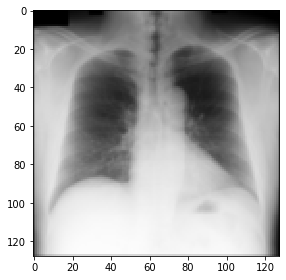

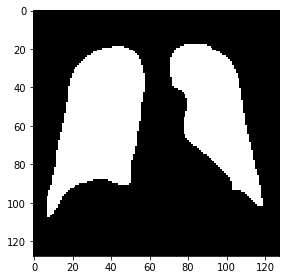

In [5]:
sys.stdout.flush()
print('Resizing training images and masks')
for n, id_ in tqdm(enumerate(train_ids), total=len(train_ids)):   
    path = TRAIN_PATH + id_
#     img=tf.keras.preprocessing.image.load_img(
#     path + '/image/' + id_ + '.png', grayscale=False, color_mode="grayscale", target_size=(IMG_HEIGHT, IMG_WIDTH), interpolation="nearest"
#     )
    img = imread(path + '/image/' + id_ + '.png')
    img = skimage.color.gray2rgb(img)
    #img = cv2.cvtColor(img, cv.CV_GRAY2RGB)
    print(img.shape)
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_train[n] = img  #Fill empty X_train with values from img
    mask = np.zeros((IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)
    for mask_file in next(os.walk(path + '/masks/'))[2]:
        mask_ = imread(path + '/masks/' + mask_file)
        mask_ = np.expand_dims(resize(mask_, (IMG_HEIGHT, IMG_WIDTH), mode='constant',  
                                      preserve_range=True), axis=-1)
        mask = np.maximum(mask, mask_)  
            
    Y_train[n] = mask   

# test images
X_test = np.zeros((len(test_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
sizes_test = []
print('Resizing test images') 
for n, id_ in tqdm(enumerate(test_ids), total=len(test_ids)):
    path = TEST_PATH + id_
    img = imread(path + '/image/' + id_ + '.png')
    img = skimage.color.gray2rgb(img)
    sizes_test.append([img.shape[0], img.shape[1]])
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_test[n] = img

print('Done!')
print(X_test.shape)

image_x = random.randint(0, len(train_ids))
imshow(X_train[image_x])
plt.show()
imshow(np.squeeze(Y_train[image_x]))
plt.show()

In [6]:
#Build the model
inputs = tf.keras.layers.Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)

#Contraction path
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)
 
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)
 
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)
 
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

#Expansive path 
u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
 
u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
 
u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
 
u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
 
outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)
 
model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 128, 128, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 16) 448         lambda[0][0]                     
__________________________________________________________________________________________________
dropout (Dropout)               (None, 128, 128, 16) 0           conv2d[0][0]                     
______________________________________________________________________________________________

In [7]:
################################
checkpointer = tf.keras.callbacks.ModelCheckpoint('model_for_lungs.h5', verbose=1, save_best_only=True)

callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss'),
        tf.keras.callbacks.TensorBoard(log_dir='logs')]

results = model.fit(X_train, Y_train, validation_split=0.1, batch_size=16, epochs=25, callbacks=callbacks)


####################################


Train on 201 samples, validate on 23 samples
Epoch 1/25
201/201 [==============================] - 22s 111ms/sample - loss: 0.6002 - accuracy: 0.6370 - val_loss: 0.5019 - val_accuracy: 0.6585
Epoch 2/25
201/201 [==============================] - 21s 104ms/sample - loss: 0.4547 - accuracy: 0.6675 - val_loss: 0.4291 - val_accuracy: 0.7585
Epoch 3/25
201/201 [==============================] - 21s 105ms/sample - loss: 0.3078 - accuracy: 0.8767 - val_loss: 0.1652 - val_accuracy: 0.9407
Epoch 4/25
201/201 [==============================] - 21s 105ms/sample - loss: 0.1544 - accuracy: 0.9399 - val_loss: 0.1455 - val_accuracy: 0.9553
Epoch 5/25
201/201 [==============================] - 21s 103ms/sample - loss: 0.1175 - accuracy: 0.9528 - val_loss: 0.1158 - val_accuracy: 0.9624
Epoch 6/25
201/201 [==============================] - 21s 103ms/sample - loss: 0.0985 - accuracy: 0.9596 - val_loss: 0.1115 - val_accuracy: 0.9548
Epoch 7/25
201/201 [==============================] - 21s 103ms/sample - 

In [53]:
idx = random.randint(0, len(X_train))



preds_train = model.predict(X_train[:int(X_train.shape[0]*0.9)], verbose=1)
preds_val = model.predict(X_train[int(X_train.shape[0]*0.9):], verbose=1)
preds_test = model.predict(X_test, verbose=1)

 
preds_train_t = (preds_train > 0.5).astype(np.uint8)
preds_val_t = (preds_val > 0.5).astype(np.uint8)
preds_test_t = (preds_test > 0.5).astype(np.uint8)


23/23 [==============================] - 0s 17ms/sample


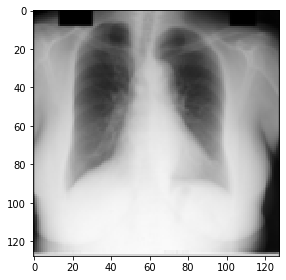

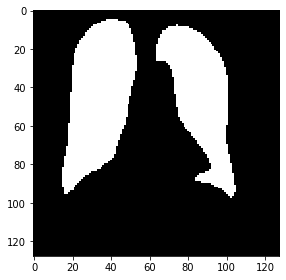

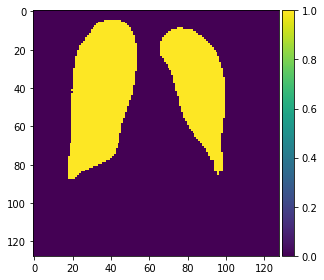

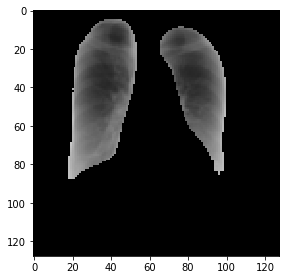

In [65]:
# Perform a sanity check on some random training samples
ix = random.randint(0, len(preds_train_t))
imshow(X_train[ix])
plt.show()
imshow(np.squeeze(Y_train[ix]))
plt.show()
imshow(np.squeeze(preds_train_t[ix]))
plt.show()
im1 = X_train[ix]
    
# creating a image2 object 
im2 =preds_train_t[ix]
   
# applying multiply method 
im3 = im1*im2 
   
imshow(im3)
plt.show()

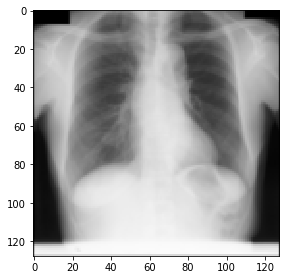

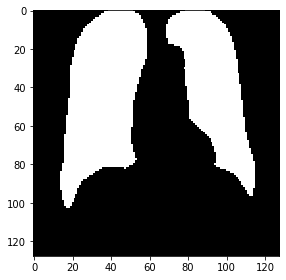

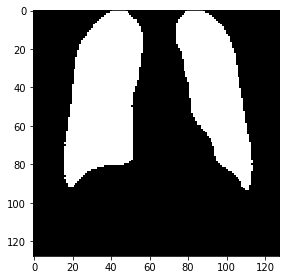

In [58]:
# Perform a sanity check on some random validation samples
ix = random.randint(0, len(preds_val_t))
imshow(X_train[int(X_train.shape[0]*0.9):][ix])
plt.show()
imshow(np.squeeze(Y_train[int(Y_train.shape[0]*0.9):][ix]))
plt.show()
imshow(np.squeeze(preds_val_t[ix]>0.429))
plt.show()


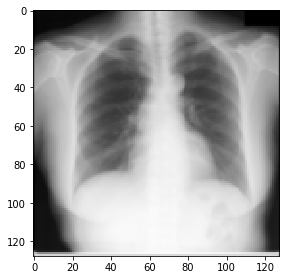

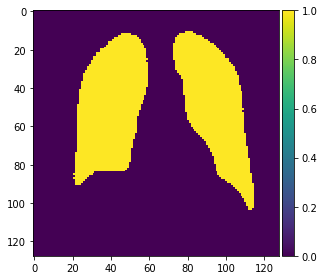

In [12]:
#ix = random.randint(0, len(preds_test_t))
imshow(X_test[2])
plt.show()

imshow(np.squeeze(preds_test_t[2]))
plt.show()